In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
import re


In [114]:
def read_datafile(path):
    with open(path, 'r') as src:
        print(f'parsing {path}')
        parsed_line = []
        parsed_lines = []
        for line in src:
            try :
                parts = line.strip().split(' ')

                if re.match('[^\W\d_]', parts[-1]):
                    # Name of the patient denotes the end of a row
                    parsed_line += parts
                    parsed_lines.append(parsed_line)
                    parsed_line = []
                
                else:
                    parsed_line += parts

            except Exception as e:
                print(f'Error parsing {path}. Returning partial dataframe.')
                break
                
    return pd.DataFrame(parsed_lines)

In [118]:
datapaths = list(Path('data/raw').glob('*.data'))
dfs = []
for path in datapaths:
    try:
        dfs.append(read_datafile(path))
    except Exception as e:
        print(f'Error parsing "{path}" : {e}')

parsing data\raw\cleveland.data
Error parsing "data\raw\cleveland.data" : 'charmap' codec can't decode byte 0x8d in position 1489: character maps to <undefined>
parsing data\raw\cleveland_minus_corrupted.data
parsing data\raw\long-beach-va.data
parsing data\raw\switzerland.data


In [164]:
with open('data/raw/schema.txt', 'r') as src:
    schema = {}
    desc = {}
    current_col = 0
    for line in src:
        parts = line.split(' ')
        try:
            current_col = int(parts[0]) - 1
            schema[current_col] = parts[1].strip(':').strip()
            desc[schema[current_col]] = ' '.join(parts[1:])
        except:
            desc[schema[current_col]] += line 


In [165]:
desc

{'id': 'id: patient identification number\n',
 'ccf': 'ccf: social security number (I replaced this with a dummy value of 0)\n',
 'age': 'age: age in years\n',
 'sex': 'sex: sex (1 = male; 0 = female)\n',
 'painloc': 'painloc: chest pain location (1 = substernal; 0 = otherwise)\n',
 'painexer': 'painexer (1 = provoked by exertion; 0 = otherwise)\n',
 'relrest': 'relrest (1 = relieved after rest; 0 = otherwise)\n',
 'pncaden': 'pncaden (sum of 5, 6, and 7)\n',
 'cp': 'cp: chest pain type\n-- Value 1: typical angina\n-- Value 2: atypical angina\n-- Value 3: non-anginal pain\n-- Value 4: asymptomatic\n',
 'trestbps': 'trestbps: resting blood pressure (in mm Hg on admission to the hospital)\n',
 'htn': 'htn\n',
 'chol': 'chol: serum cholestoral in mg/dl\n',
 'smoke': 'smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)\n',
 'cigs': 'cigs (cigarettes per day)\n',
 'years': 'years (number of years as a smoker)\n',
 'fbs': 'fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = fa

In [166]:
for df in dfs:
    print(df.shape)

(282, 76)
(200, 76)
(123, 76)


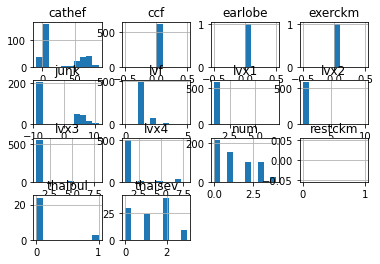

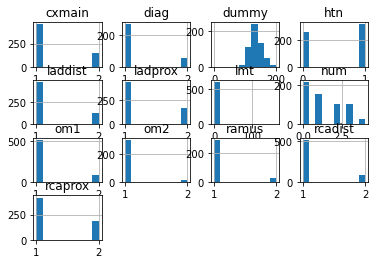

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 0 to 122
Data columns (total 50 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        605 non-null    int64  
 1   age       605 non-null    int64  
 2   sex       605 non-null    int64  
 3   painloc   323 non-null    float64
 4   painexer  323 non-null    float64
 5   relrest   319 non-null    float64
 6   pncaden   0 non-null      float64
 7   cp        605 non-null    int64  
 8   trestbps  547 non-null    float64
 9   chol      598 non-null    float64
 10  smoke     218 non-null    float64
 11  cigs      478 non-null    float64
 12  years     467 non-null    float64
 13  fbs       523 non-null    float64
 14  dm        74 non-null     float64
 15  famhist   476 non-null    float64
 16  restecg   604 non-null    float64
 17  ekgmo     552 non-null    float64
 18  ekgday    551 non-null    float64
 19  ekgyr     552 non-null    float64
 20  dig       538 non-null    float6

In [167]:
df = pd.concat(dfs)
df.columns = [v for k, v in schema.items()]
df = df.replace({'?': None, '-9': None})

for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        continue

unused_cols = ['name', 'junk', 'cathef', 'lvf', 'lvx4', 'lvx3', 'lvx2', 'lvx1',  'earlobe', 'thalpul', 'thalsev', 'exerckm', 'restckm', 'ccf']

df[unused_cols + ['num']].hist()

no_desc_cols = ['rcadist', 'rcaprox', 'om1', 'om2', 'ramus', 'cxmain', 'diag', 'laddist', 'ladprox', 'lmt', 'htn', 'dummy']

df[no_desc_cols + ['num']].hist()

df = df.drop(unused_cols + no_desc_cols, axis=1)
plt.show()
df.info()

In [168]:
cols = list(df.columns)
cols[cols.index('num')] = 'heart_disease'
df.columns = cols

In [174]:
df.isna().mean().sort_values()

id               0.000000
cp               0.000000
heart_disease    0.000000
sex              0.000000
age              0.000000
restecg          0.001653
chol             0.011570
cday             0.014876
cyr              0.014876
cmo              0.018182
ekgyr            0.087603
ekgmo            0.087603
ekgday           0.089256
thalach          0.089256
thaldur          0.089256
exang            0.089256
thalrest         0.090909
xhypo            0.092562
trestbpd         0.095868
trestbps         0.095868
pro              0.102479
oldpeak          0.102479
tpeakbpd         0.102479
tpeakbps         0.102479
prop             0.105785
nitr             0.105785
dig              0.110744
diuretic         0.133884
fbs              0.135537
met              0.170248
proto            0.170248
slope            0.195041
cigs             0.209917
famhist          0.213223
years            0.228099
rldv5e           0.234711
thal             0.348760
thaltime         0.434711
painexer    

In [ ]:
datatime_cols = ['ekgday', 'ekgmo', 'ekgyr']

In [183]:
desc['cday']

'cday: day of cardiac cath (sp?)\n'

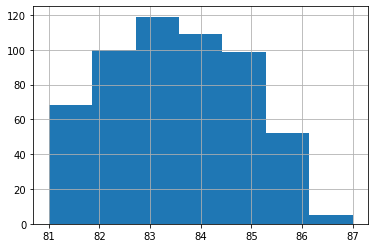

In [179]:
df['ekgyr'].hist(bins=7)

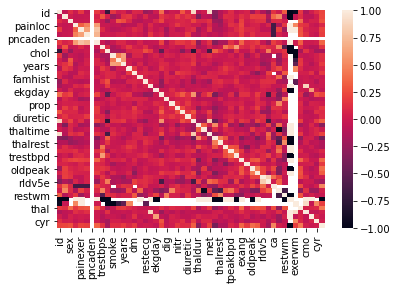

In [170]:
sns.heatmap(df.corr())

In [ ]:
# TODO Inspect null values and treat them

In [147]:
# TODO Remap categorical features

2.0    225
0.0     49
1.0     45
dtype: int64

In [137]:
proc = pd.read_csv('data/heart.csv')
proc
df[proc.columns]

KeyError: "['trtbps', 'output', 'exng', 'thalachh'] not in index"

In [138]:
df[['age', 'sex', 'painexer', 'chol', 'slope', 'oldpeak']]

,age,sex,painexer,chol,slope,oldpeak
0,63,1,NaN,233.0,3.0,2.3
1,67,1,NaN,286.0,2.0,1.5
2,67,1,NaN,229.0,2.0,2.6
3,37,1,NaN,250.0,3.0,3.5
4,41,0,NaN,204.0,1.0,1.4
...,...,...,...,...,...,...
118,54,1,1.0,0.0,2.0,1.5
119,56,1,1.0,0.0,2.0,1.0
120,56,1,1.0,0.0,2.0,-2.0
121,54,1,1.0,0.0,2.0,3.0


In [139]:
proc

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slope,ca,thal,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [88]:
proc.loc[(proc.age == 63) & (proc.sex == 1)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slope,ca,thal,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
